In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# sync_offsets = np.random.normal(size=(72,11))
# times = np.tile(np.random.uniform(low=(72-6)*60*60, high=(72+6)*60*60, size=11), (72,1))

# np.savetxt("toy_syncs.csv", sync_offsets, delimiter=",")
# np.savetxt("toy_times.csv", times, delimiter=",")

# ## make fake CTAGs by subrun
# bins = 72*60*60/10  # 10 sec bins, 72 hour run
# ctags = np.random.uniform(low=0, high=1000, size=bins)

# bin_edges = np.linspace(0, 72*3600, bins+1)

# save_array = np.empty((bins, 2))
# save_array[:,0] = bin_edges[0:-1]
# save_array[:,1] = ctags
# np.savetxt('toy_ctags.csv', save_array, delimiter=',')

In [3]:
syncs = np.genfromtxt('toy_syncs.csv', delimiter=',')/61.79e6*1e9
times = np.genfromtxt('toy_times.csv', delimiter=',')
bins_ = np.genfromtxt('toy_ctags.csv', delimiter=',')[:,0] + 5
ctags = np.genfromtxt('toy_ctags.csv', delimiter=',')[:,1]

In [17]:
## normalize the sync offsets to time, Hz/sqrt(sec)

def gaussian(x, A, s, x0):
    return A*np.exp(-(x-x0)**2/2/s**2)

rates = syncs/np.sqrt(times)

counts, bins = np.histogram(rates.flatten(), bins=50)
bins = (bins[:-1]+bins[1:])/2
p, cov = curve_fit(gaussian,  bins,  counts, p0=(170, 0.01, 0))

rate = p[1]**2

In [18]:
print p[1]*60
print np.std(rates.flatten())*60
print (np.quantile(rates.flatten(), 0.5+.341) - np.quantile(rates.flatten(), 0.5-.341))/2*60

1.9297216561953319
1.942917645159239
1.9086121781396994


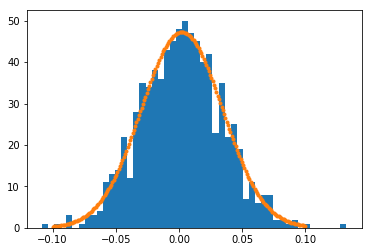

In [12]:
_ = plt.hist(rates.flatten(), bins=50)
x_ = np.linspace(-.1, .1, 200)
plt.plot(x_, gaussian(x_, p[0], p[1], p[2]), '.')

In [19]:
print np.sqrt(rate)*np.sqrt(3600)

1.9297216561953319


In [20]:
def cov(t1, t2, T, M=0.01810259**2):  # units for M are Hz^2/sec
    u = np.minimum(t1, t2)
    v = np.maximum(t1, t2)
    return M * (T - v) * u / T

def cov2(t1, t2, T, M=0.01810259**2):  # units for M are Hz^2/sec
    u = np.minimum(t1, t2)
    v = np.maximum(t1, t2)
    return M * u

In [21]:
a = ctags/np.sum(ctags)

t1 = np.outer(bins_, np.ones(bins_.size))
t2 = np.outer(np.ones(bins_.size), bins_)

t_period = 72*3600

sigma = cov(t1, t2, t_period, M=1)  # use M=1, scale with rates later to save time
sigma_avg = np.dot(a, np.dot(sigma, a))

sigma2 = cov2(t1, t2, t_period, M=1)  # use M=1, scale with rates later to save time
sigma2_avg = np.dot(a, np.dot(sigma2, a))

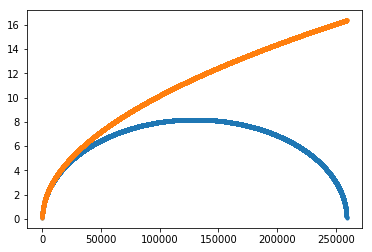

In [23]:
plt.plot(bins_, np.sqrt(rate*np.diagonal(sigma)), '.')
plt.plot(bins_, np.sqrt(rate*np.diagonal(sigma2)), '.')

In [24]:
np.max(np.sqrt(rate*np.diagonal(sigma)))

8.187115607296532